In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import imutils
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_styled_landmarks(image, results):    
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(89,122,255), thickness=1, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(29,226,200), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(29,226,200), thickness=1, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(153,255,51), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(153,51,255), thickness=1, circle_radius=2)
                                 )

In [9]:
# IGNORE
cap = cv2.VideoCapture(0)

# Set mediapipe model, if you want higher or lower, change confidence number
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
draw_styled_landmarks(frame, results)

In [11]:
# IGNORE
results

mediapipe.python.solution_base.SolutionOutputs

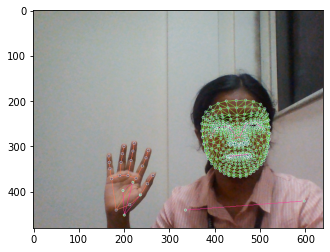

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
# IGNORE
cap = cv2.VideoCapture(0)
while cap.isOpened():
    
    # Read Feed
    ret, frame = cap.read()
    
    # Show to Screen
    cv2.imshow('OpenCV Feed', frame)
    
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [14]:
# IGNORE
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
# IGNORE
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
pose

array([ 7.08666384e-01,  5.92693090e-01, -1.22622430e+00,  9.99797225e-01,
        7.35245824e-01,  5.19246817e-01, -1.17520833e+00,  9.99605834e-01,
        7.53215075e-01,  5.16801298e-01, -1.17526686e+00,  9.99482572e-01,
        7.66460657e-01,  5.16579926e-01, -1.17516398e+00,  9.99341726e-01,
        6.72338307e-01,  5.32380342e-01, -1.15212166e+00,  9.99744117e-01,
        6.50082648e-01,  5.37527382e-01, -1.15195501e+00,  9.99765158e-01,
        6.32580996e-01,  5.42961717e-01, -1.15203285e+00,  9.99813139e-01,
        7.94702113e-01,  5.46882570e-01, -7.41125464e-01,  9.99351382e-01,
        6.13104939e-01,  5.84281504e-01, -6.17193937e-01,  9.99781907e-01,
        7.47775137e-01,  6.60538077e-01, -1.06324697e+00,  9.99669671e-01,
        6.73127711e-01,  6.71210587e-01, -1.02878284e+00,  9.99751925e-01,
        9.34537709e-01,  8.76749277e-01, -4.61459816e-01,  9.59660053e-01,
        5.25656581e-01,  9.18197393e-01, -2.45163754e-01,  9.97469485e-01,
        1.05819309e+00,  

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('FinalW-Z') 

# Actions that we try to detect
actions = np.array(['W','X','Y','Z'])

# Five videos worth of data
no_sequences = 5

# Videos are going to be 5 frames in length
sequence_length = 5

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [21]:
# IGNORE
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    for action in actions:
        # Loop through sequences aka videos : 20 Videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length : 5 Frames
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                frame = imutils.resize(frame,width = 500,height = 1000)

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(5000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'W': 0, 'X': 1, 'Y': 2, 'Z': 3}

In [23]:
sequences, labels = [], []
no_sequences = 5
sequence_length = 5
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        
np.array(sequences).shape
np.array(labels).shape
X = np.array(sequences)
X.shape
y = to_categorical(labels).astype(int)
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape
X_train.shape

(19, 5, 1662)

In [24]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(5,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [25]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
1/1 [==============================] - 11s 11s/step - loss: 1.3880 - categorical_accuracy: 0.2105
Epoch 2/500
1/1 [==============================] - 0s 116ms/step - loss: 1.3862 - categorical_accuracy: 0.2105
Epoch 3/500
1/1 [==============================] - 0s 116ms/step - loss: 1.3832 - categorical_accuracy: 0.2105
Epoch 4/500
1/1 [==============================] - 0s 107ms/step - loss: 1.3707 - categorical_accuracy: 0.4211
Epoch 5/500
1/1 [==============================] - 0s 100ms/step - loss: 1.3485 - categorical_accuracy: 0.2632
Epoch 6/500
1/1 [==============================] - 0s 78ms/step - loss: 1.3126 - categorical_accuracy: 0.4211
Epoch 7/500
1/1 [==============================] - 0s 185ms/step - loss: 1.2626 - categorical_accuracy: 0.4211
Epoch 8/500
1/1 [==============================] - 0s 154ms/step - loss: 1.1952 - categorical_accuracy: 0.4211
Epoch 9/500
1/1 [==============================] - 0s 116ms/step - loss: 1.1625 - categorical_accuracy: 0.4211
Epo

1/1 [==============================] - 0s 116ms/step - loss: 0.0557 - categorical_accuracy: 1.0000
Epoch 75/500
1/1 [==============================] - 0s 232ms/step - loss: 0.0300 - categorical_accuracy: 1.0000
Epoch 76/500
1/1 [==============================] - 0s 122ms/step - loss: 0.0187 - categorical_accuracy: 1.0000
Epoch 77/500
1/1 [==============================] - 0s 132ms/step - loss: 0.0216 - categorical_accuracy: 1.0000
Epoch 78/500
1/1 [==============================] - 0s 163ms/step - loss: 0.0262 - categorical_accuracy: 1.0000
Epoch 79/500
1/1 [==============================] - 0s 85ms/step - loss: 0.0203 - categorical_accuracy: 1.0000
Epoch 80/500
1/1 [==============================] - 0s 100ms/step - loss: 0.0107 - categorical_accuracy: 1.0000
Epoch 81/500
1/1 [==============================] - 0s 100ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 82/500
1/1 [==============================] - 0s 100ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 

1/1 [==============================] - 1s 524ms/step - loss: 1.9407e-04 - categorical_accuracy: 1.0000
Epoch 146/500
1/1 [==============================] - 0s 479ms/step - loss: 1.9144e-04 - categorical_accuracy: 1.0000
Epoch 147/500
1/1 [==============================] - 0s 248ms/step - loss: 1.8887e-04 - categorical_accuracy: 1.0000
Epoch 148/500
1/1 [==============================] - 0s 401ms/step - loss: 1.8633e-04 - categorical_accuracy: 1.0000
Epoch 149/500
1/1 [==============================] - 0s 270ms/step - loss: 1.8387e-04 - categorical_accuracy: 1.0000
Epoch 150/500
1/1 [==============================] - 0s 385ms/step - loss: 1.8152e-04 - categorical_accuracy: 1.0000
Epoch 151/500
1/1 [==============================] - 0s 147ms/step - loss: 1.7929e-04 - categorical_accuracy: 1.0000
Epoch 152/500
1/1 [==============================] - 0s 138ms/step - loss: 1.7710e-04 - categorical_accuracy: 1.0000
Epoch 153/500
1/1 [==============================] - 0s 100ms/step - loss: 1.7

1/1 [==============================] - 0s 116ms/step - loss: 9.0033e-05 - categorical_accuracy: 1.0000
Epoch 216/500
1/1 [==============================] - 0s 116ms/step - loss: 8.8992e-05 - categorical_accuracy: 1.0000
Epoch 217/500
1/1 [==============================] - 0s 100ms/step - loss: 8.7988e-05 - categorical_accuracy: 1.0000
Epoch 218/500
1/1 [==============================] - 0s 216ms/step - loss: 8.6985e-05 - categorical_accuracy: 1.0000
Epoch 219/500
1/1 [==============================] - 0s 100ms/step - loss: 8.6031e-05 - categorical_accuracy: 1.0000
Epoch 220/500
1/1 [==============================] - 0s 132ms/step - loss: 8.5021e-05 - categorical_accuracy: 1.0000
Epoch 221/500
1/1 [==============================] - 0s 100ms/step - loss: 8.3578e-05 - categorical_accuracy: 1.0000
Epoch 222/500
1/1 [==============================] - 0s 100ms/step - loss: 8.2092e-05 - categorical_accuracy: 1.0000
Epoch 223/500
1/1 [==============================] - 0s 132ms/step - loss: 8.0

1/1 [==============================] - 0s 116ms/step - loss: 2.4211e-05 - categorical_accuracy: 1.0000
Epoch 286/500
1/1 [==============================] - 0s 85ms/step - loss: 2.3992e-05 - categorical_accuracy: 1.0000
Epoch 287/500
1/1 [==============================] - 0s 100ms/step - loss: 2.3753e-05 - categorical_accuracy: 1.0000
Epoch 288/500
1/1 [==============================] - 0s 132ms/step - loss: 2.3540e-05 - categorical_accuracy: 1.0000
Epoch 289/500
1/1 [==============================] - 0s 116ms/step - loss: 2.3339e-05 - categorical_accuracy: 1.0000
Epoch 290/500
1/1 [==============================] - 0s 122ms/step - loss: 2.3139e-05 - categorical_accuracy: 1.0000
Epoch 291/500
1/1 [==============================] - 0s 132ms/step - loss: 2.2944e-05 - categorical_accuracy: 1.0000
Epoch 292/500
1/1 [==============================] - 0s 116ms/step - loss: 2.2743e-05 - categorical_accuracy: 1.0000
Epoch 293/500
1/1 [==============================] - 0s 116ms/step - loss: 2.25

1/1 [==============================] - 0s 116ms/step - loss: 1.4794e-05 - categorical_accuracy: 1.0000
Epoch 356/500
1/1 [==============================] - 0s 100ms/step - loss: 1.4719e-05 - categorical_accuracy: 1.0000
Epoch 357/500
1/1 [==============================] - 0s 85ms/step - loss: 1.4644e-05 - categorical_accuracy: 1.0000
Epoch 358/500
1/1 [==============================] - 0s 132ms/step - loss: 1.4575e-05 - categorical_accuracy: 1.0000
Epoch 359/500
1/1 [==============================] - 0s 100ms/step - loss: 1.4493e-05 - categorical_accuracy: 1.0000
Epoch 360/500
1/1 [==============================] - 0s 116ms/step - loss: 1.4418e-05 - categorical_accuracy: 1.0000
Epoch 361/500
1/1 [==============================] - 0s 85ms/step - loss: 1.4343e-05 - categorical_accuracy: 1.0000
Epoch 362/500
1/1 [==============================] - 0s 116ms/step - loss: 1.4274e-05 - categorical_accuracy: 1.0000
Epoch 363/500
1/1 [==============================] - 0s 116ms/step - loss: 1.417

1/1 [==============================] - 0s 100ms/step - loss: 1.0641e-05 - categorical_accuracy: 1.0000
Epoch 426/500
1/1 [==============================] - 0s 132ms/step - loss: 1.0603e-05 - categorical_accuracy: 1.0000
Epoch 427/500
1/1 [==============================] - 0s 94ms/step - loss: 1.0553e-05 - categorical_accuracy: 1.0000
Epoch 428/500
1/1 [==============================] - 0s 100ms/step - loss: 1.0522e-05 - categorical_accuracy: 1.0000
Epoch 429/500
1/1 [==============================] - 0s 116ms/step - loss: 1.0478e-05 - categorical_accuracy: 1.0000
Epoch 430/500
1/1 [==============================] - 0s 163ms/step - loss: 1.0434e-05 - categorical_accuracy: 1.0000
Epoch 431/500
1/1 [==============================] - 0s 116ms/step - loss: 1.0396e-05 - categorical_accuracy: 1.0000
Epoch 432/500
1/1 [==============================] - 0s 100ms/step - loss: 1.0352e-05 - categorical_accuracy: 1.0000
Epoch 433/500
1/1 [==============================] - 0s 85ms/step - loss: 1.032

1/1 [==============================] - 0s 94ms/step - loss: 8.2003e-06 - categorical_accuracy: 1.0000
Epoch 496/500
1/1 [==============================] - 0s 69ms/step - loss: 8.1689e-06 - categorical_accuracy: 1.0000
Epoch 497/500
1/1 [==============================] - 0s 138ms/step - loss: 8.1626e-06 - categorical_accuracy: 1.0000
Epoch 498/500
1/1 [==============================] - 0s 100ms/step - loss: 8.1250e-06 - categorical_accuracy: 1.0000
Epoch 499/500
1/1 [==============================] - 0s 100ms/step - loss: 8.1062e-06 - categorical_accuracy: 1.0000
Epoch 500/500
1/1 [==============================] - 0s 100ms/step - loss: 8.0748e-06 - categorical_accuracy: 1.0000


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             442112    
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596,708
Trainable params: 596,708
Non-trai

In [28]:
res = model.predict(X_test)

model.save('action2.h5')

In [29]:
model.load_weights('action2.h5')

In [30]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
# IGNORE
#multilabel_confusion_matrix??

# [True Negative][False Positive]
# [False Negative][True Postive]
multilabel_confusion_matrix(ytrue,yhat)

array([[[0, 0],
        [0, 1]]], dtype=int64)

In [31]:
accuracy_score(ytrue, yhat)

1.0

In [32]:
from scipy import stats
colors = [(245,117,16), (117,245,16), (16,117,245), (116,127,145), (10,287,15),(12,267,125),(1,234,235)
          ,(10,145,189),(24,165,134),(145,146,147),(234,215,217),(123,124,125),(145,156,100),(130,100,179)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [33]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        # Resize Feed to be bigger
        frame = imutils.resize(frame,width = 1000,height = 1000)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-5:]
        
        if len(sequence) == 5:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-5:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (1,0), (700, 40), (245, 117, 16), -1)
        
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('m'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [39]:
# IGNORE
# Call If webcame is still Focused
cap.release()
cv2.destroyAllWindows()

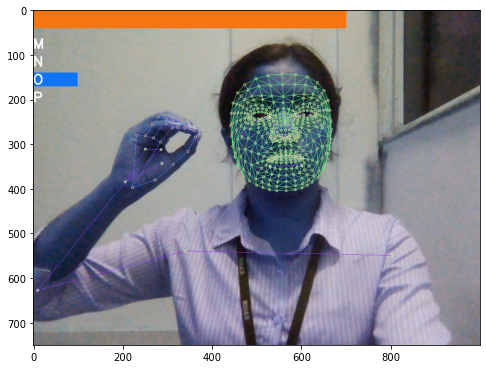

In [40]:
plt.figure(figsize=(8,8))
plt.imshow(prob_viz(res, actions, image, colors))